# **3.1 For Classification Task**

**1. Exploratory Data Analysis and Data Understanding**

1. Choosing a Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset into a DataFrame object using the Pandas library.
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/jupyter/water_potability.csv")
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


# ** Perform an initial analysis to gather a detailed description of the dataset. For example:**

(a) When and by whom was the dataset created?

-> This dataset was created by  Akash Patel in 2022 AD.

(b) How did you access the dataset?

-> I accessed this dataset through Kaggle.

(c) How does it align with the chosen UNSDG?

-> This dataset is aligned to Goal 6: Clean Water and Sanitation.

(d) List all the attributes (columns) present in the dataset?

In [ ]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


**Here are some potential questions that the dataset could help answer.**

(a) What are the key factors affecting water potability?

(b) Can we predict whether water is potable based on its chemical properties?

(c) How do different water quality parameters correlate with each other?

(d) How much missing data is present in the dataset, and how should it be handled?

(e) Can we group water samples into different categories based on their characteristics?

(f) Are there outliers in the dataset that could indicate measurement errors or unusual water conditions?

**Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality)?**

1. Data Completeness -> The dataset appears complete, with missing values detected in key columns (ph, Sulfate, Trihalomethanes).

2. Data Relevance -> The dataset contains essential water features like pH, Hardness, Solids and Potability which is a binary feature essential for indicating if the water us safe for drinking or not.

3. Data Quality -> The data is well-structured and formatted appropriately, potential issues such as missing values, inconsistent units, outliers, and data accuracy challenges pose risks to its overall quality. Addressing these issues is essential for ensuring reliable analysis and prediction in water quality assessments.

# **2. Conducting Exploratory Data Analysis (EDA):**

**(a) Performing data cleaning.**

In [ ]:
 #checking for missing values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
#filling missing values with median
df.fillna(df.median(), inplace=True)

# Verifying if missing values are removed
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
# Checking for duplicate rows
print(df.duplicated().sum())

0


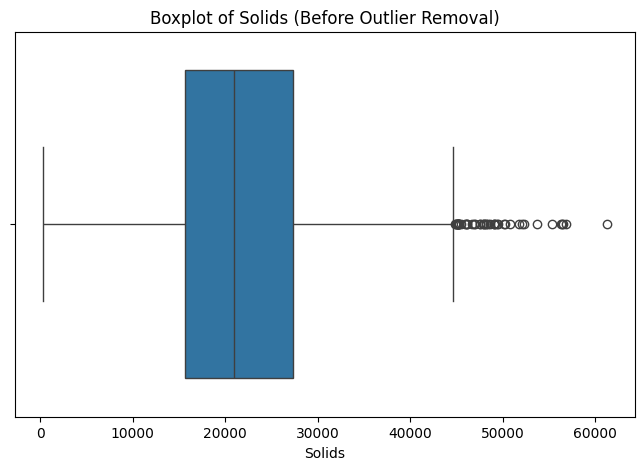

In [ ]:
#Checking the outliers to detect extreme values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Solids"])
plt.title("Boxplot of Solids (Before Outlier Removal)")
plt.show()


So in this above boxplot of outlier detection The Solids feature has a much higher range of values compared to others

In [ ]:
#Here we will be cleaning Solids since it has alot of oultliers in above boxplot
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/jupyter/water_potability.csv')

# perfoming IQR
#Q1 = df["Solids"].quantile(0.25)
#Q3 = df["Solids"].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Removing outliers
#df_cleaned = df[(df["Solids"] >= lower_bound) & (df["Solids"] <= upper_bound)]

#print(f"Rows before removing outliers: {len(df)}")
#print(f"Rows after removing outliers: {len(df_cleaned)}")
Q1 = df["Solids"].quantile(0.25)  # 25th percentile
Q3 = df["Solids"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["Solids"] >= lower_bound) & (df["Solids"] <= upper_bound)]

print(f"Original Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {df_cleaned.shape}")

Original Data Shape: (3276, 10)
Cleaned Data Shape: (3229, 10)


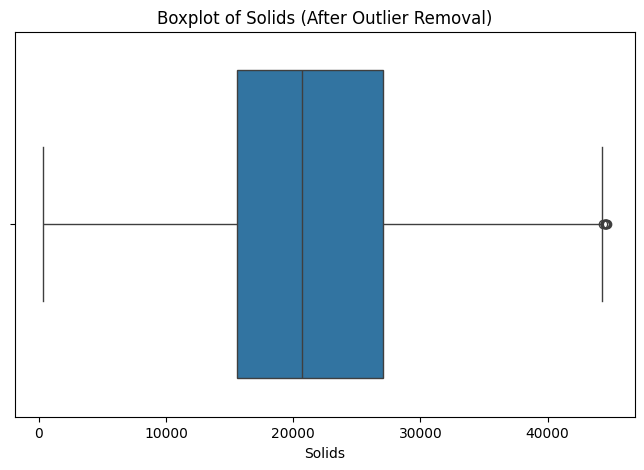

In [ ]:
 #Verify Outlier Removal
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Solids"])
plt.title("Boxplot of Solids (After Outlier Removal)")
plt.show()


In [ ]:
print(df.describe()) #summary statistics of dataset to see how it is

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


## **Explore the data through visualizations and charts. Ensure you explain and summarize the** **insights gained from each chart**.

<ipython-input-33-41925efdcfe1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Potability", data=df, palette="coolwarm")


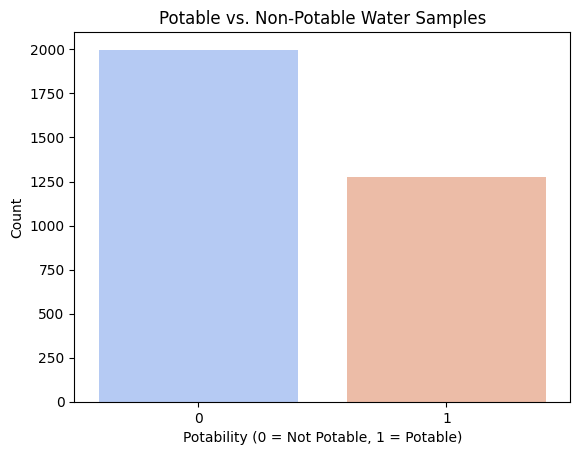

In [ ]:
#Bar Plot of Potable vs. Non-Potable Water
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Potability", data=df, palette="coolwarm")
plt.title("Potable vs. Non-Potable Water Samples")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()


In the above **Bar-plot** of potable and non potable water the visualization appears to be a bar chart comparing the counts of potable (safe to drink) and non-potable (not safe to drink) water samples in a dataset.

The bar for 0 (non-potable) is much taller than the bar for 1 (potable). This means there are significantly more non-potable water samples in the dataset compared to potable ones.

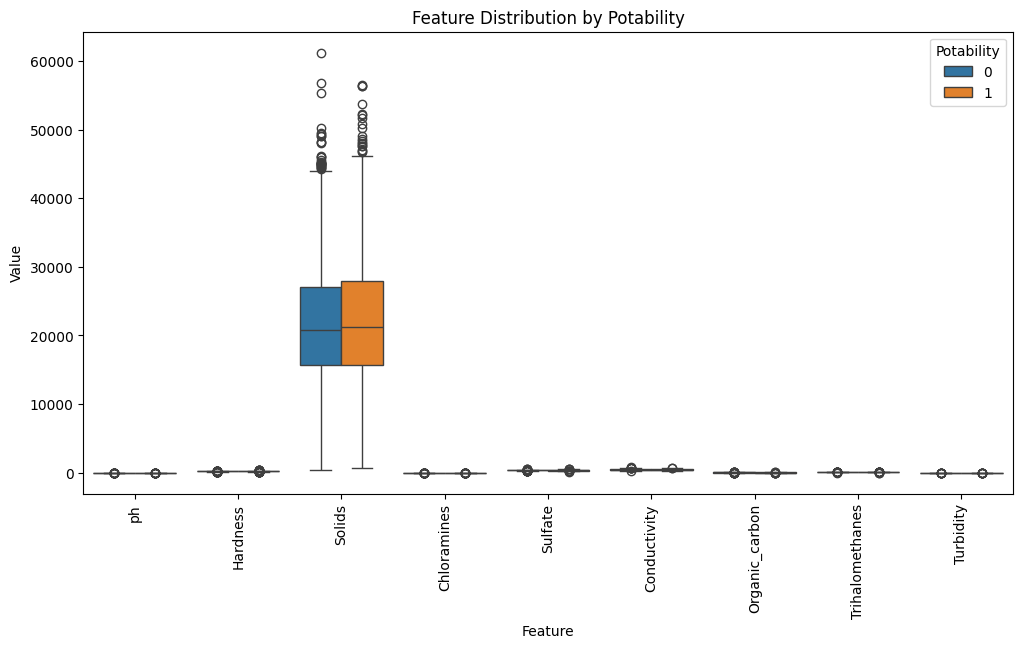

In [ ]:
#Visualizing box-plot of features by potability
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars="Potability", var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", hue="Potability", data=df_melted)
plt.xticks(rotation=90)
plt.title("Feature Distribution by Potability")
plt.legend(title="Potability", loc="upper right")
plt.show()


This chart compares the distribution of feature values for potable (1) and non-potable (0) water samples.

Non-potable water (0) has higher values of solids compared to potable water (1). This means that water with a lot of solids is more likely to be non-potable.

There’s a difference in chloramine levels between potable and non-potable water. This could mean chloramine levels help determine whether water is drinkable.



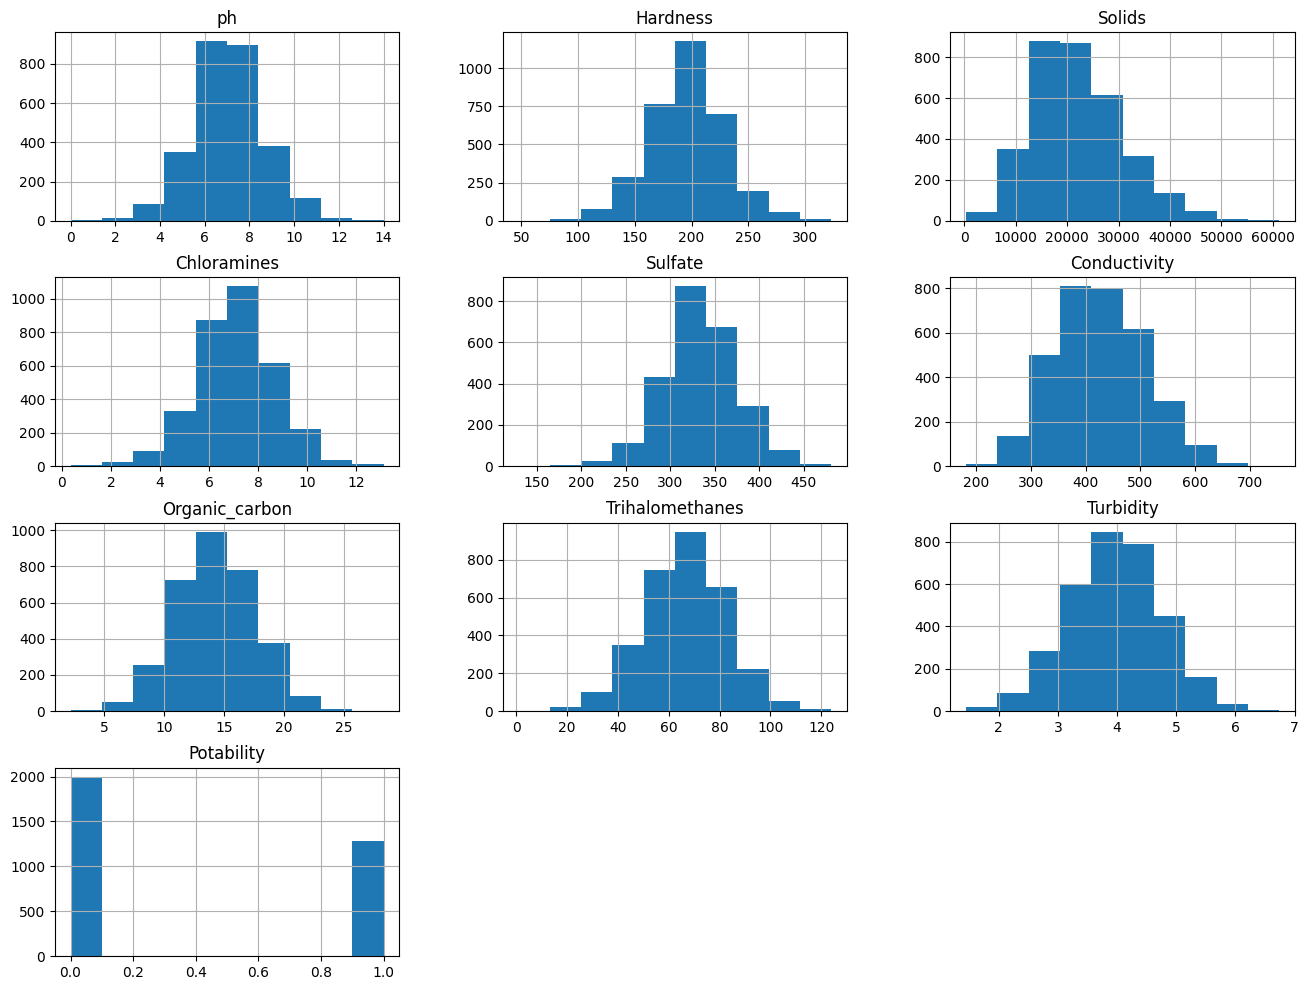

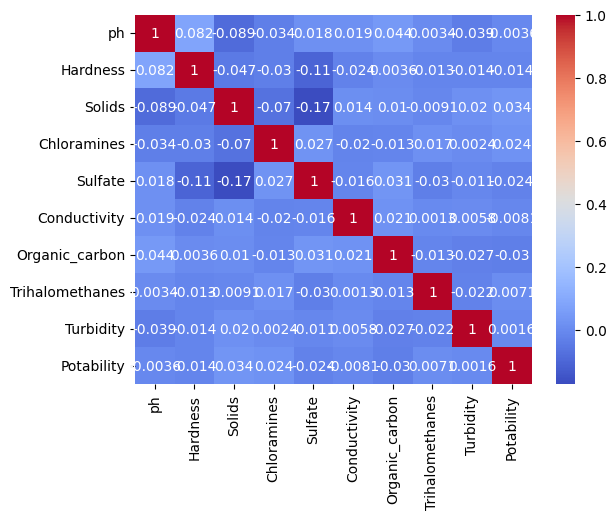

In [ ]:
#histogram for each column and correlation matrix for heatmap
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(16, 12))  # Histograms for each column
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  # Correlation heatmap
plt.show()


In above there is histogram for each column and correlation matrix for heatmap

**Histogram** is a graphical representation of the distribution of numerical data. It divides the data into intervals (bins) and counts how many data points fall into each bin. This helps visualize the frequency of values within a dataset.

Each histogram provides insights into the spread and central tendency (e.g., mean, median) of the feature.

This visualization is crucial for data preprocessing and analysis, as it can guide decisions like normalization, handling missing values, or removing outliers.

**Correlation matrix** shows us the correlation coefficients between variables in a dataset where correlation values ranges from: -1: which is perfect negative correlation, 0: No correlation, +1: Perfect positive correlation.

Each cell represents the correlation between two features.

The diagonal of the matrix always has a value of 1 because a feature is perfectly correlated with itself.

Heatmap visualizing the correlations where Darker colors likely indicate stronger correlations (positive or negative). Lighter colors suggest weaker correlations.

This matrix helps identify relationships between variables. For example, if two features have a strong positive or negative correlation, one might influence the other or they may share a common trend.

# **2. Build a Model from Scratch or and Build a Primary Model:**

**For Classification Task, build a Appropriate Logistic Regression {Sigmoid or Softmax} from scratch, and report
the appropriate evaluation metrics on train and test set.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import auc

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/water_potability.csv')

In [ ]:
data.fillna(data.median(), inplace=True)

In [ ]:
# Splitting features and target
X = data.drop(columns=['Potability'])
y = data['Potability']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Feature selection

In [ ]:
# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

In [ ]:
# Select features with importance > 0.02 (you can adjust this threshold)
selected_features = X.columns[feature_importances > 0.02]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected Features: {selected_features}")

Selected Features: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


In [ ]:
# Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))
import numpy as np

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
# Optimized Logistic Regression Class (Multi-class with Softmax)
class LogisticRegressionScratch:
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda  # Regularization strength
        self.tol = tol  # Convergence tolerance
        self.decay_rate = decay_rate  # Learning rate decay rate

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.k = len(np.unique(y))  # Number of classes
        self.weights = np.zeros((self.n, self.k))  # One set of weights per class
        self.bias = np.zeros(self.k)  # One bias per class
        self.losses = []

        # One-hot encode the labels
        y_one_hot = np.eye(self.k)[y]

        for epoch in range(self.epochs):
            # Mini-batch Gradient Descent
            if self.batch_size:
                indices = np.random.choice(self.m, self.batch_size, replace=False)
                X_batch, y_batch = X[indices], y_one_hot[indices]
            else:
                X_batch, y_batch = X, y_one_hot  # Full batch

            # Compute predictions using softmax
            linear_model = np.dot(X_batch, self.weights) + self.bias
            predictions = softmax(linear_model)

            # Compute loss with L2 regularization (categorical cross-entropy)
            loss = -np.mean(np.sum(y_batch * np.log(predictions + 1e-9), axis=1)) + \
                   (self.reg_lambda / (2 * self.m)) * np.sum(self.weights ** 2)
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X_batch.T, (predictions - y_batch)) + (self.reg_lambda / self.m) * self.weights
            db = (1 / self.m) * np.sum(predictions - y_batch, axis=0)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Early stopping based on loss convergence
            if epoch > 0 and abs(self.losses[-1] - self.losses[-2]) < self.tol:
                print(f"Converged at epoch {epoch}")
                break

            # Learning rate decay
            self.lr *= self.decay_rate  # Decay learning rate each epoch

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = softmax(linear_model)
        return np.argmax(predictions, axis=1)  # Return the class with the highest probability



In [ ]:
class LogisticRegressionWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.tol = tol
        self.decay_rate = decay_rate
        self.model = LogisticRegressionScratch(lr=lr, epochs=epochs, batch_size=batch_size,
                                                reg_lambda=reg_lambda, tol=tol, decay_rate=decay_rate)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# **Hyper Parameter optimization and cross validation**

In [ ]:
param_grid = {
    'lr': [0.01, 0.05, 0.1],
    'epochs': [250, 500, 1000],
    'batch_size': [None, 32, 64],
    'reg_lambda': [0.01, 0.1, 0.15],
    'decay_rate': [0.95, 0.99]
}

In [ ]:
model = LogisticRegressionWrapper()

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

Converged at epoch 951


GridSearchCV(cv=3, estimator=LogisticRegressionWrapper(), n_jobs=-1,
             param_grid={'batch_size': [None, 32, 64],
                         'decay_rate': [0.95, 0.99], 'epochs': [250, 500, 1000],
                         'lr': [0.01, 0.05, 0.1],
                         'reg_lambda': [0.01, 0.1, 0.15]},
             scoring='accuracy')

In [ ]:
# Get best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'batch_size': None, 'decay_rate': 0.95, 'epochs': 250, 'lr': 0.01, 'reg_lambda': 0.01}


In [ ]:
# Make predictions with the best model
y_pred_best = best_model.predict(X_test_selected)

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the results
print("\nBest Logistic Regression Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print(f"AUC-ROC: {roc_auc_best:.4f}")



Best Logistic Regression Performance:
Accuracy: 0.5910
Precision: 0.4722
Recall: 0.3523
F1 Score: 0.4036
AUC-ROC: 0.5489


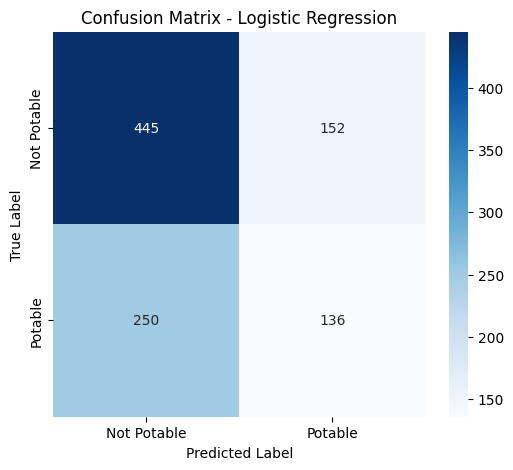

In [ ]:
# ---- 1️⃣ Confusion Matrix ----
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


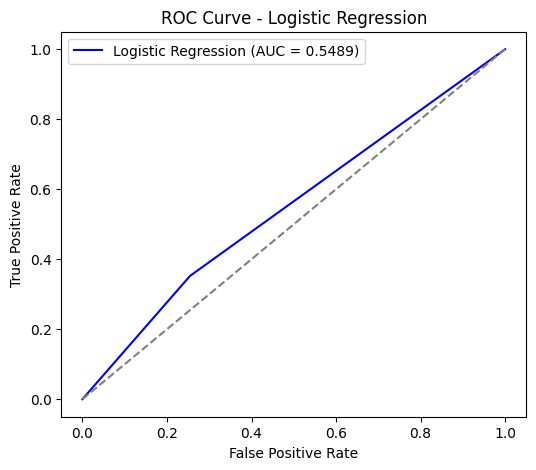

In [ ]:
# ---- 2️⃣ ROC Curve ----
y_pred_prob_best = best_model.model.predict(X_test_selected)  # Get probabilities from logistic regression

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best)  # Compute ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob_best)  # Compute AUC-ROC score

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Converged at epoch 189
Converged at epoch 118
Converged at epoch 112
Converged at epoch 122
Converged at epoch 115
Converged at epoch 115
Converged at epoch 110
Converged at epoch 122
Converged at epoch 127
Converged at epoch 114
Converged at epoch 112
Converged at epoch 122
Converged at epoch 115
Converged at epoch 114
Converged at epoch 114
Converged at epoch 122
Converged at epoch 115
Converged at epoch 116
Converged at epoch 113


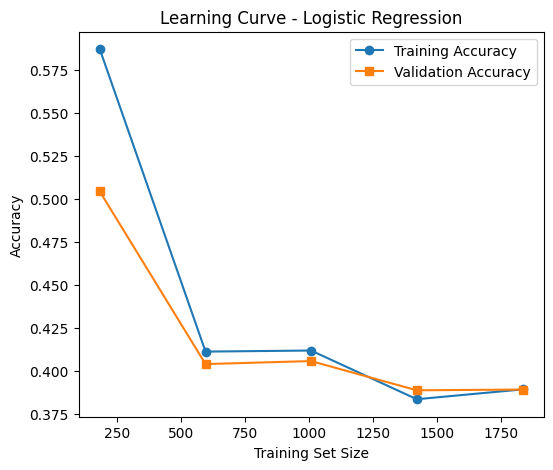

In [ ]:
# ---- 3️⃣ Learning Curve ----
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_selected, y_train, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
#this is KNN matrix
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best parameters and model
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
# Make predictions with the best KNN model
y_pred_best_knn = best_knn.predict(X_test_selected)

In [ ]:
if hasattr(best_knn, "predict_proba"):
    y_pred_prob_knn = best_knn.predict_proba(X_test_selected)[:, 1]
else:
    y_pred_prob_knn = np.zeros_like(y_test)  # Fallback to zero if predict_proba is unavailable


In [ ]:
# Evaluate the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
recall_best_knn = recall_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn)
roc_auc_best_knn = roc_auc_score(y_test, y_pred_best_knn)

In [ ]:
# Print best KNN results
print("\nBest KNN Classifier Performance:")
print(f"Accuracy: {accuracy_best_knn:.4f}")
print(f"Precision: {precision_best_knn:.4f}")
print(f"Recall: {recall_best_knn:.4f}")
print(f"F1 Score: {f1_best_knn:.4f}")
print(f"AUC-ROC: {roc_auc_best_knn:.4f}")


Best KNN Classifier Performance:
Accuracy: 0.5890
Precision: 0.4571
Recall: 0.2487
F1 Score: 0.3221
AUC-ROC: 0.5289


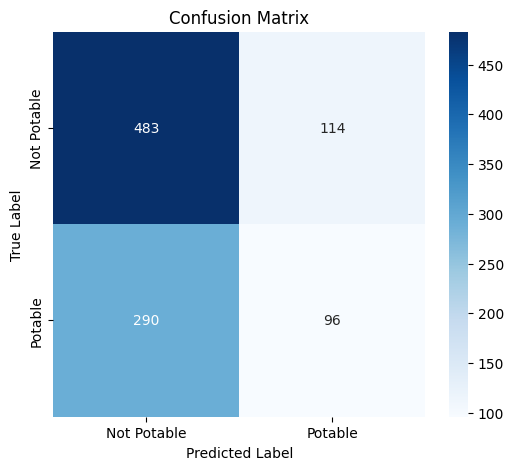

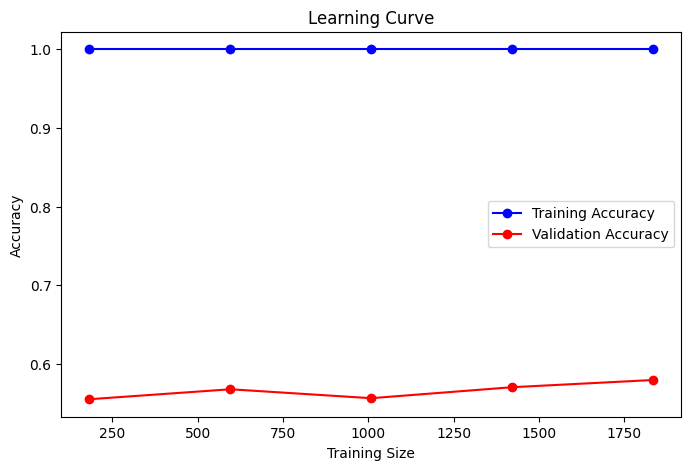

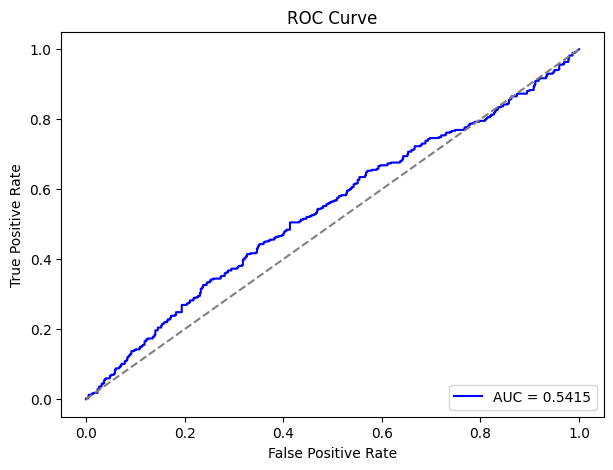

In [ ]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_knn, X_train_selected, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

#Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Loss Curve:**

The Loss Curve shows how the model's error (loss) decreases over training epochs.

Decreasing Loss → The model is learning well, improving over time.

Flat Loss (No Change) → The learning rate may be too low, or the model has converged.

High Initial Loss → The model starts with bad predictions but improves over time.

Loss Not Decreasing or Increasing → Learning rate could be too high, leading to instability.

Loss Stops Decreasing Too Early → Possible underfitting, meaning the model isn't learning enough patterns.

Goal: A smoothly decreasing loss curve without abrupt spikes or flattening too early.

In conclusion, Loss Curve tells you how well the model is learning during training.

**ROC Curve:**

The ROC Curve (Receiver Operating Characteristic) plots True Positive Rate (Recall) vs False Positive Rate across different classification thresholds.

Closer to the Top Left Corner → The model performs well, with high true positives and low false positives.

AUC-ROC Value (Area Under Curve)
Close to 1 → Excellent model (separates classes well).
Around 0.5 → Poor model (random guessing).
Below 0.5 → Model is worse than random (probably misclassified labels).

A Smooth Curve vs Jagged Curve
A smooth curve indicates a well-trained model.
A jagged curve can indicate a small dataset or unstable predictions.

Goal: A high AUC (≥0.8) and a curve that moves towards the top-left corner.

ROC Curve tells you how well the trained model distinguishes between classes.

Both together give a complete picture:
✅ If loss is low and ROC is high (AUC ~0.9) → The model is working well.
⚠️ If loss is low but ROC is low (AUC ~0.5) → The model memorized data but isn’t generalizing well.

# **Rebuilding the Final Model **

Converged at epoch 951
Best Parameters: {'batch_size': None, 'decay_rate': 0.95, 'epochs': 250, 'lr': 0.01, 'reg_lambda': 0.01}

Best Logistic Regression Performance:
Accuracy: 0.5910
Precision: 0.4722
Recall: 0.3523
F1 Score: 0.4036
AUC-ROC: 0.5489


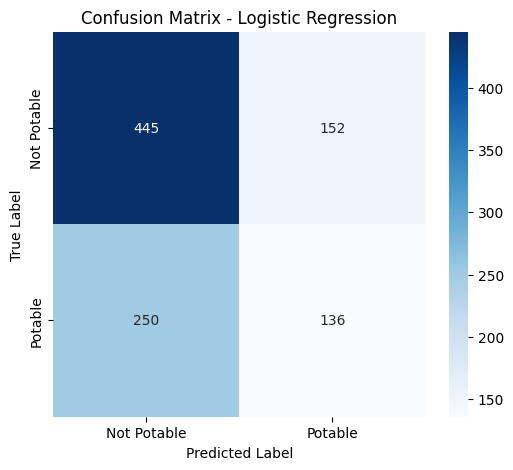

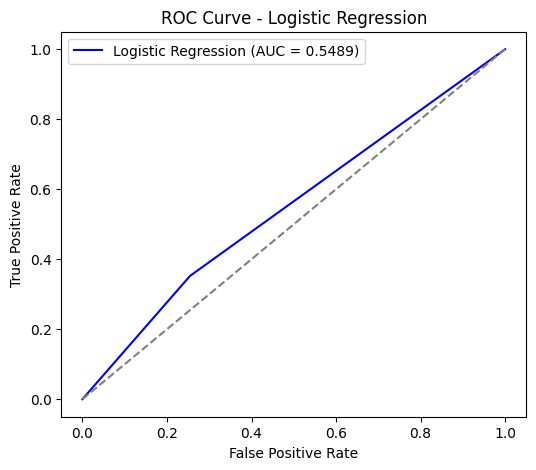

Converged at epoch 189
Converged at epoch 118
Converged at epoch 112
Converged at epoch 122
Converged at epoch 115
Converged at epoch 115
Converged at epoch 110
Converged at epoch 122
Converged at epoch 127
Converged at epoch 114
Converged at epoch 112
Converged at epoch 122
Converged at epoch 115
Converged at epoch 114
Converged at epoch 114
Converged at epoch 122
Converged at epoch 115
Converged at epoch 116
Converged at epoch 113


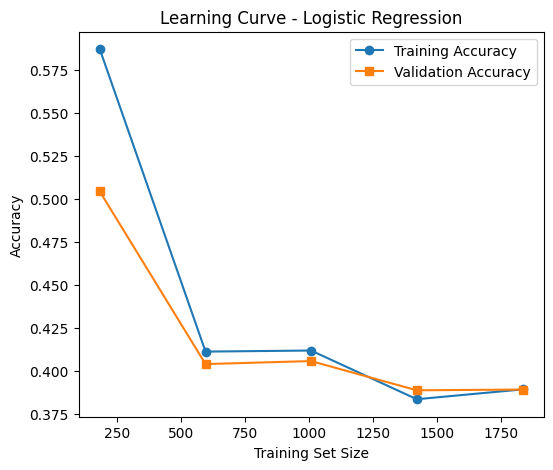

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import auc

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/water_potability.csv')
#rebuild both models from Task - 3.
data.fillna(data.median(), inplace=True)

# Splitting features and target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Select features with importance > 0.02 (you can adjust this threshold)
selected_features = X.columns[feature_importances > 0.02]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected Features: {selected_features}")

# Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))
import numpy as np

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Optimized Logistic Regression Class (Multi-class with Softmax)
class LogisticRegressionScratch:
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda  # Regularization strength
        self.tol = tol  # Convergence tolerance
        self.decay_rate = decay_rate  # Learning rate decay rate

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.k = len(np.unique(y))  # Number of classes
        self.weights = np.zeros((self.n, self.k))  # One set of weights per class
        self.bias = np.zeros(self.k)  # One bias per class
        self.losses = []

        # One-hot encode the labels
        y_one_hot = np.eye(self.k)[y]

        for epoch in range(self.epochs):
            # Mini-batch Gradient Descent
            if self.batch_size:
                indices = np.random.choice(self.m, self.batch_size, replace=False)
                X_batch, y_batch = X[indices], y_one_hot[indices]
            else:
                X_batch, y_batch = X, y_one_hot  # Full batch

            # Compute predictions using softmax
            linear_model = np.dot(X_batch, self.weights) + self.bias
            predictions = softmax(linear_model)

            # Compute loss with L2 regularization (categorical cross-entropy)
            loss = -np.mean(np.sum(y_batch * np.log(predictions + 1e-9), axis=1)) + \
                   (self.reg_lambda / (2 * self.m)) * np.sum(self.weights ** 2)
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X_batch.T, (predictions - y_batch)) + (self.reg_lambda / self.m) * self.weights
            db = (1 / self.m) * np.sum(predictions - y_batch, axis=0)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Early stopping based on loss convergence
            if epoch > 0 and abs(self.losses[-1] - self.losses[-2]) < self.tol:
                print(f"Converged at epoch {epoch}")
                break

            # Learning rate decay
            self.lr *= self.decay_rate  # Decay learning rate each epoch

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = softmax(linear_model)
        return np.argmax(predictions, axis=1)  # Return the class with the highest probability

class LogisticRegressionWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.tol = tol
        self.decay_rate = decay_rate
        self.model = LogisticRegressionScratch(lr=lr, epochs=epochs, batch_size=batch_size,
                                                reg_lambda=reg_lambda, tol=tol, decay_rate=decay_rate)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

param_grid = {
    'lr': [0.01, 0.05, 0.1],
    'epochs': [250, 500, 1000],
    'batch_size': [None, 32, 64],
    'reg_lambda': [0.01, 0.1, 0.15],
    'decay_rate': [0.95, 0.99]
}
model = LogisticRegressionWrapper()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the results
print("\nBest Logistic Regression Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print(f"AUC-ROC: {roc_auc_best:.4f}")

# ---- 1️⃣ Confusion Matrix ----
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ---- 2️⃣ ROC Curve ----
y_pred_prob_best = best_model.model.predict(X_test_selected)  # Get probabilities from logistic regression

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best)  # Compute ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob_best)  # Compute AUC-ROC score

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# ---- 3️⃣ Learning Curve ----
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_selected, y_train, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import auc

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/jupyter/water_potability.csv')
#rebuild both models from Task - 3.
data.fillna(data.median(), inplace=True)

# Splitting features and target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Select features with importance > 0.02 (you can adjust this threshold)
selected_features = X.columns[feature_importances > 0.02]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Selected Features: {selected_features}")

# Sigmoid function
# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))
import numpy as np

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Optimized Logistic Regression Class (Multi-class with Softmax)
class LogisticRegressionScratch:
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda  # Regularization strength
        self.tol = tol  # Convergence tolerance
        self.decay_rate = decay_rate  # Learning rate decay rate

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.k = len(np.unique(y))  # Number of classes
        self.weights = np.zeros((self.n, self.k))  # One set of weights per class
        self.bias = np.zeros(self.k)  # One bias per class
        self.losses = []

        # One-hot encode the labels
        y_one_hot = np.eye(self.k)[y]

        for epoch in range(self.epochs):
            # Mini-batch Gradient Descent
            if self.batch_size:
                indices = np.random.choice(self.m, self.batch_size, replace=False)
                X_batch, y_batch = X[indices], y_one_hot[indices]
            else:
                X_batch, y_batch = X, y_one_hot  # Full batch

            # Compute predictions using softmax
            linear_model = np.dot(X_batch, self.weights) + self.bias
            predictions = softmax(linear_model)

            # Compute loss with L2 regularization (categorical cross-entropy)
            loss = -np.mean(np.sum(y_batch * np.log(predictions + 1e-9), axis=1)) + \
                   (self.reg_lambda / (2 * self.m)) * np.sum(self.weights ** 2)
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / self.m) * np.dot(X_batch.T, (predictions - y_batch)) + (self.reg_lambda / self.m) * self.weights
            db = (1 / self.m) * np.sum(predictions - y_batch, axis=0)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Early stopping based on loss convergence
            if epoch > 0 and abs(self.losses[-1] - self.losses[-2]) < self.tol:
                print(f"Converged at epoch {epoch}")
                break

            # Learning rate decay
            self.lr *= self.decay_rate  # Decay learning rate each epoch

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = softmax(linear_model)
        return np.argmax(predictions, axis=1)  # Return the class with the highest probability

class LogisticRegressionWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.15, epochs=1000, batch_size=None, reg_lambda=0.15, tol=1e-6, decay_rate=0.99):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.tol = tol
        self.decay_rate = decay_rate
        self.model = LogisticRegressionScratch(lr=lr, epochs=epochs, batch_size=batch_size,
                                                reg_lambda=reg_lambda, tol=tol, decay_rate=decay_rate)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

param_grid = {
    'lr': [0.01, 0.05, 0.1],
    'epochs': [250, 500, 1000],
    'batch_size': [None, 32, 64],
    'reg_lambda': [0.01, 0.1, 0.15],
    'decay_rate': [0.95, 0.99]
}
model = LogisticRegressionWrapper()
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the results
print("\nBest Logistic Regression Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print(f"AUC-ROC: {roc_auc_best:.4f}")

# ---- 1️⃣ Confusion Matrix ----
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ---- 2️⃣ ROC Curve ----
y_pred_prob_best = best_model.model.predict(X_test_selected)  # Get probabilities from logistic regression

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best)  # Compute ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob_best)  # Compute AUC-ROC score

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# ---- 3️⃣ Learning Curve ----
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_selected, y_train, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()

#this is KNN matrix
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best parameters and model
best_knn = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best KNN model
y_pred_best_knn = best_knn.predict(X_test_selected)

if hasattr(best_knn, "predict_proba"):
    y_pred_prob_knn = best_knn.predict_proba(X_test_selected)[:, 1]
else:
    y_pred_prob_knn = np.zeros_like(y_test)  # Fallback to zero if predict_proba is unavailable

# Evaluate the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
recall_best_knn = recall_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn)
roc_auc_best_knn = roc_auc_score(y_test, y_pred_best_knn)

# Print best KNN results
print("\nBest KNN Classifier Performance:")
print(f"Accuracy: {accuracy_best_knn:.4f}")
print(f"Precision: {precision_best_knn:.4f}")
print(f"Recall: {recall_best_knn:.4f}")
print(f"F1 Score: {f1_best_knn:.4f}")
print(f"AUC-ROC: {roc_auc_best_knn:.4f}")

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_knn, X_train_selected, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

#Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()